In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Mall_Customers.csv')

print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

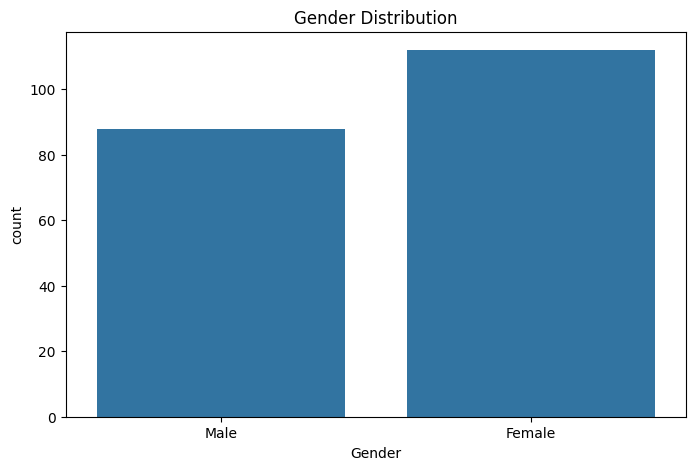

In [26]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.show()

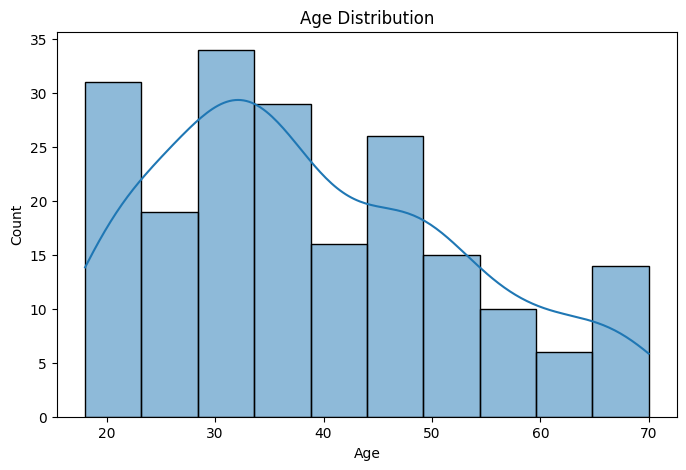

In [27]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.show()

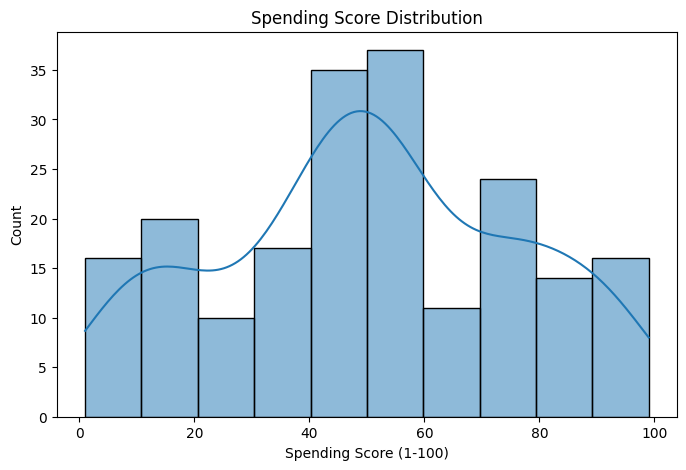

In [28]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Spending Score (1-100)'], bins=10, kde=True)
plt.title('Spending Score Distribution')
plt.show()

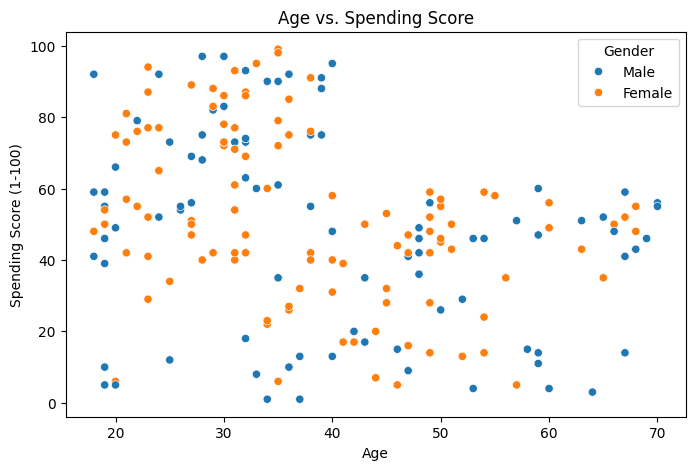

In [29]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=data)
plt.title('Age vs. Spending Score')
plt.show()

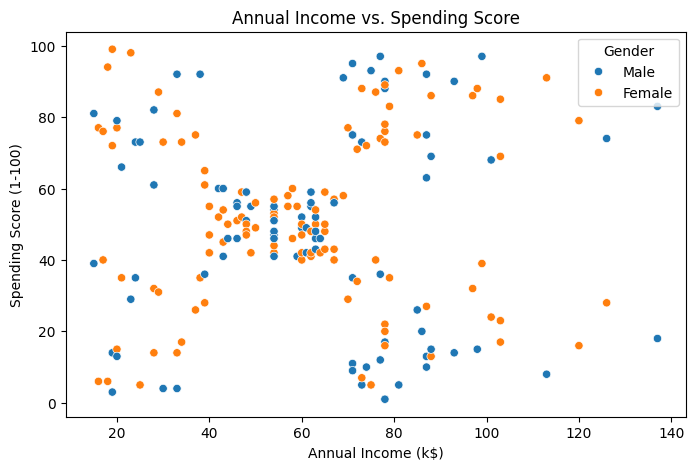

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=data)
plt.title('Annual Income vs. Spending Score')
plt.show()

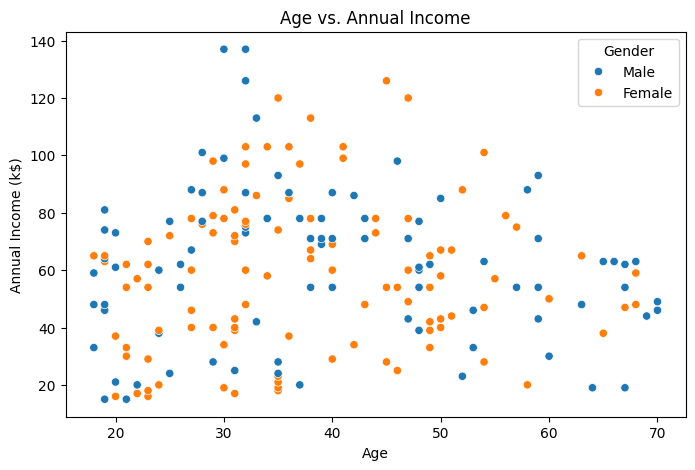

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Gender', data=data)
plt.title('Age vs. Annual Income')
plt.show()

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [30]:
df=pd.DataFrame()
df["x"]=data["Annual Income (k$)"]
df["y"]=data["Spending Score (1-100)"]
df.head()

,x,y
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [31]:
import math
import numpy as np
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

def distance(x1,x2,y1,y2):
    return math.sqrt((x2-x1)**2+(y2-y1)**2)


m = 100
P = [Point(0, 0) for _ in range(m)]

for i in range(m):
    P[i].x, P[i].y = df.loc[i, 'x'], df.loc[i, 'y']

k = int(input("Enter the number of clusters: "))
rp_indices = np.random.choice(m, size=k, replace=False)  # Randomly select k indices from the dataset

rp = [Point(0, 0) for _ in range(k)]

for i in range(k):
    rp[i].x, rp[i].y = df.loc[rp_indices[i], 'x'], df.loc[rp_indices[i], 'y']

rx=[]
ry=[]
for i in range(k):
    rx.append(rp[i].x)
    ry.append(rp[i].y)
px=[]
py=[]
for i in range(m):
    px.append(P[i].x)
    py.append(P[i].y)


Enter the number of clusters: 5


In [32]:
while True:
    arr = [[] for _ in range(k)]
    mp = Point(0,0)
    count = [0] * k

    for i in range(m):
        d=[]
        for j in range(k):
            d.append(distance(P[i].x,rp[j].x,P[i].y,rp[j].y))
        c = d.index(min(d))
        arr[c].append(P[i])
        count[c] += 1



    res = [Point(0,0) for _ in range(k)]

    for i in range(k):
            sum_x = sum_y = 0.0
            for j in range(count[i]):
                sum_x += arr[i][j].x
                sum_y += arr[i][j].y
            res[i].x=sum_x / count[i]
            res[i].y=sum_y / count[i]

    flag = 0
    for i in range(k):
        for p in range(k):
            if rp[i].x == res[p].x and rp[i].y == res[p].y:
                flag += 1

    if flag == k:
        print("Successssssss....")
        for i in range(k):
            print("Cluster no.:", i + 1)
            for j in range(count[i]):
                print(f"({arr[i][j].x},{arr[i][j].y})", end=" ")
            print()
        break
    else:
        print("Sorry...next trial...")
        rx=[]
        ry=[]
        for i in range(k):
            rp[i].x = res[i].x
            rp[i].y = res[i].y
            rx.append(rp[i].x)
            ry.append(rp[i].y)

Sorry...next trial...
Sorry...next trial...
Sorry...next trial...
Sorry...next trial...
Sorry...next trial...
Sorry...next trial...
Successssssss....
Cluster no.: 1
(54,47) (54,54) (54,53) (54,48) (54,52) (54,42) (54,51) (54,55) (54,41) (54,44) (54,57) (54,46) (57,58) (57,55) (58,60) (58,46) (59,55) (59,41) (60,49) (60,40) (60,42) (60,52) (60,47) (60,50) (61,42) (61,49) 
Cluster no.: 2
(38,35) (39,36) (39,61) (40,55) (40,47) (40,42) (40,42) (42,52) (42,60) (43,54) (43,60) (43,45) (43,41) (44,50) (44,46) (46,51) (46,46) (46,56) (46,55) (47,52) (47,59) (48,51) (48,59) (48,50) (48,48) (48,59) (48,47) (49,55) (49,42) (50,49) (50,56) 
Cluster no.: 3
(15,39) (16,6) (17,40) (18,6) (19,3) (19,14) (20,15) (20,13) (21,35) (23,29) (24,35) (25,5) (28,14) (28,32) (29,31) (30,4) (33,4) (33,14) (34,17) (37,26) (39,28) 
Cluster no.: 4
(15,81) (16,77) (17,76) (18,94) (19,99) (20,77) (20,79) (23,98) (28,82) (29,87) (33,92) (33,81) (38,92) 
Cluster no.: 5
(19,72) (21,66) (24,73) (25,73) (28,61) (30,73) (

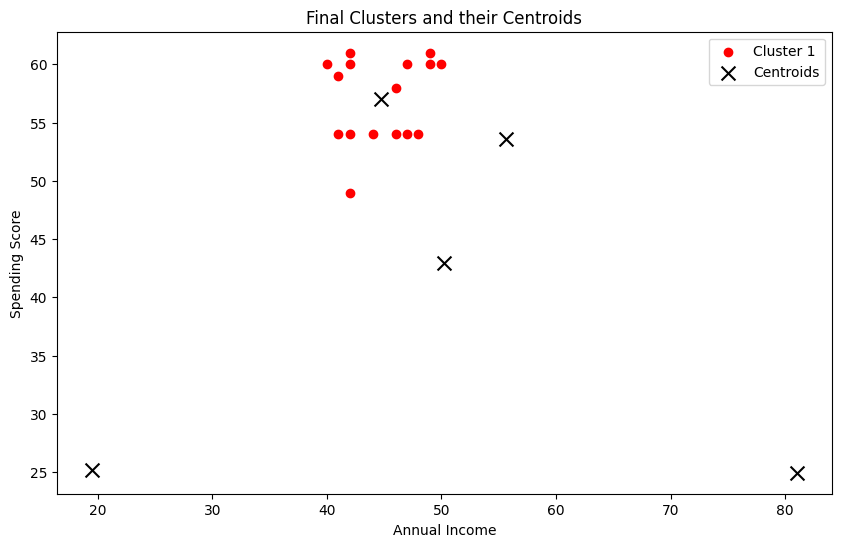

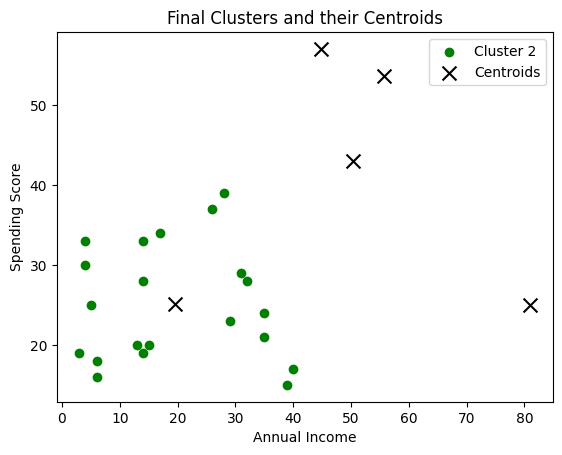

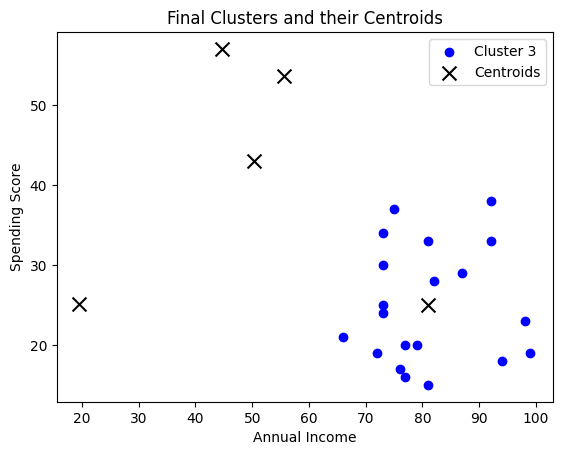

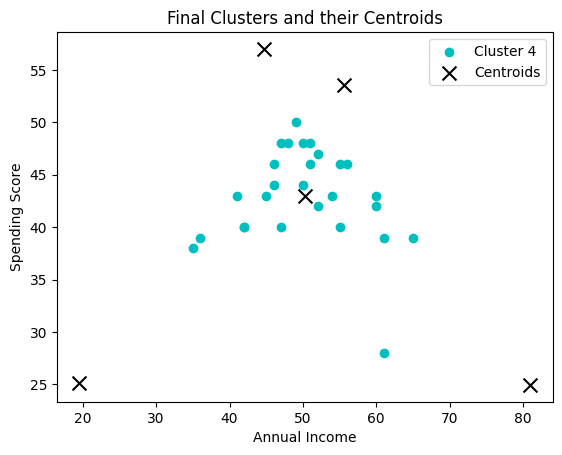

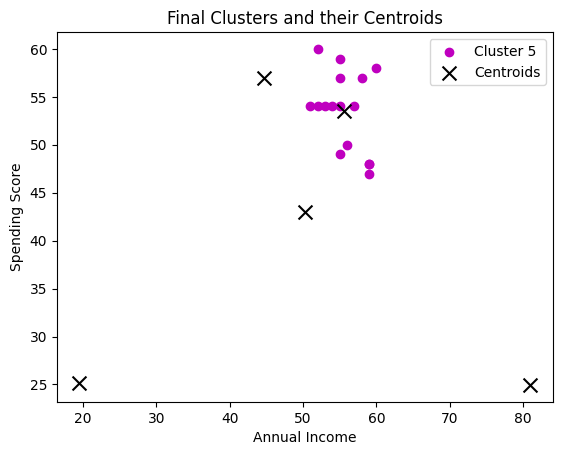

In [24]:
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for i in range(k):
    cluster_x = [point.x for point in arr[i]]
    cluster_y = [point.y for point in arr[i]]
    plt.scatter(cluster_x, cluster_y, color=colors[i % len(colors)], label=f'Cluster {i + 1}')
    centroid_x = [rp[i].x for i in range(k)]
    centroid_y = [rp[i].y for i in range(k)]
    plt.scatter(centroid_x, centroid_y, color='black', marker='x', s=100, label='Centroids')
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.title('Final Clusters and their Centroids')
    plt.legend()
    plt.show()
